In [10]:
import pandas as pd
import os
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
benchmarks_path = Path("./benchmarks")
dfs = []
for algo in benchmarks_path.iterdir():
    for lang in algo.iterdir():
        results_path = (lang / "results.json").absolute()
        if not results_path.exists():
            continue
        df = pd.read_json(results_path)
        df['algorithm'] = algo.name
        df['language'] = lang.name
        dfs.append(df)


In [12]:
df = pd.concat(dfs)
df.to_csv("results.csv", index=False)
df

,input,time,algorithm,language
0,1,0.005375,fibonacci,deno
1,5,0.001917,fibonacci,deno
2,10,0.005458,fibonacci,deno
3,15,0.082875,fibonacci,deno
4,20,0.260708,fibonacci,deno
...,...,...,...,...
40,46,3046.000000,fibonacci,v
41,47,4891.000000,fibonacci,v
42,48,7932.000000,fibonacci,v
43,49,12838.000000,fibonacci,v


In [13]:
df.groupby(['algorithm', 'language', 'input']).mean()

time
algorithm language input             
fibonacci bun      1         0.003361
                   5         0.000417
                   10        0.010597
                   15        0.054375
                   20        0.102042
...                               ...
          zig      35       19.126222
                   40      213.205722
                   45     2358.081778
                   46     3763.280722
                   47     6096.393764

[153 rows x 1 columns]

In [14]:
pivot_table = pd.pivot_table(df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
pivot_table.sort_values(by=40, ascending=True)
pivot_table.loc[:, pivot_table.columns > 25]

input                      30          35           40           45  \
algorithm language                                                    
fibonacci bun        3.936611   37.638361   409.036708  4541.887569   
          c          1.766667   17.596667   173.656667  1859.450000   
          cpp        1.611403   18.247528   169.953750  1867.312431   
          deno       4.441556   50.304292   554.447403  6106.863320   
          golang     2.122930   21.275611   242.532500  2578.465333   
          java       1.281348   13.163513   146.948555  1634.662167   
          nodejs     4.831041   49.932875   558.278125  6188.973139   
          python    64.684788  708.991369  7874.239922          NaN   
          rust       1.985167   21.736986   209.155861  2303.339639   
          swift      1.972083   21.119014   233.091541  2574.164056   
          v          1.333333   17.333333   172.000000  1890.333333   
          zig        1.662583   19.126222   213.205722  2358.081778   

input                        46           47            48            49  \
algorithm language                                                         
fibonacci bun               NaN          NaN           NaN           NaN   
          c         2988.676667  4810.250000           NaN           NaN   
          cpp       2978.983778  4837.508708   7760.781625  12693.196278   
          deno              NaN          NaN           NaN           NaN   
          golang    4189.252819  6770.944569  10933.819639  17555.739986   
          java      2629.129556  4255.865444   6875.854986  11165.340528   
          nodejs            NaN          NaN           NaN           NaN   
          python            NaN          NaN           NaN           NaN   
          rust      3715.774222  5983.422014   9693.272014  15717.685638   
          swift     4138.204125  6762.558084  11026.559931  17737.293014   
          v         3049.333333  4911.333333   8004.666667  12904.666667   
          zig       3763.280722  6096.393764           NaN           NaN   

input                         50  
algorithm language                
fibonacci bun                NaN  
          c                  NaN  
          cpp       20401.475389  
          deno               NaN  
          golang    28275.664153  
          java      18059.085028  
          nodejs             NaN  
          python             NaN  
          rust      25426.727125  
          swift     28542.918514  
          v         20880.000000  
          zig                NaN

In [15]:
# export pivot_table to markdown table
print(pivot_table.to_markdown())


|                         |           1 |           5 |          10 |         15 |        20 |       25 |       30 |       35 |       40 |      45 |      46 |      47 |       48 |      49 |      50 |
|:------------------------|------------:|------------:|------------:|-----------:|----------:|---------:|---------:|---------:|---------:|--------:|--------:|--------:|---------:|--------:|--------:|
| ('fibonacci', 'bun')    | 0.003361    | 0.000416667 | 0.0105973   | 0.054375   | 0.102042  | 0.606764 |  3.93661 |  37.6384 |  409.037 | 4541.89 |  nan    |  nan    |   nan    |   nan   |   nan   |
| ('fibonacci', 'c')      | 0           | 0           | 0           | 0          | 0.0133333 | 0.153333 |  1.76667 |  17.5967 |  173.657 | 1859.45 | 2988.68 | 4810.25 |   nan    |   nan   |   nan   |
| ('fibonacci', 'cpp')    | 0.00108333  | 0.000708333 | 0.000875    | 0.00175    | 0.0133333 | 0.142875 |  1.6114  |  18.2475 |  169.954 | 1867.31 | 2978.98 | 4837.51 |  7760.78 | 12693.2 | 20401.5 |


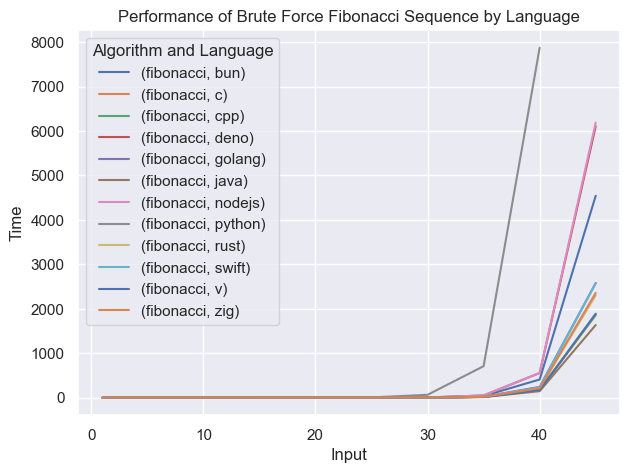

In [16]:
sns.set_theme(style="darkgrid")
# filter out column > 45
pivot_table2 = pivot_table.loc[:, pivot_table.columns <= 45]
pivot_table2.T.plot(kind='line', figsize=(10, 6))
plt.xlabel('Input')
plt.ylabel('Time')
plt.title('Performance of Brute Force Fibonacci Sequence by Language')
plt.legend(title='Algorithm and Language')
plt.gcf().set_size_inches(7, 5)
plt.grid(True)
plt.show()

In [17]:
def plot_langs(languages: list[str], min_input: int = 38):
    filtered_df = df[df['language'].isin(languages)]

    # Create a new pivot table with the filtered data
    filtered_pivot_table = pd.pivot_table(filtered_df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
    filtered_pivot_table = filtered_pivot_table.loc[:, filtered_pivot_table.columns >= min_input]

    # Plot the filtered pivot table
    sns.set_theme(style="darkgrid")
    filtered_pivot_table.T.plot(kind='line', figsize=(10, 6))
    plt.xlabel('Input')
    plt.ylabel('Time')
    plt.title('Performance of Brute Force Fibonacci Sequence by Language (Filtered)')
    plt.legend(title='Algorithm and Language')
    plt.gcf().set_size_inches(7, 5)
    plt.grid(True)
    plt.show()

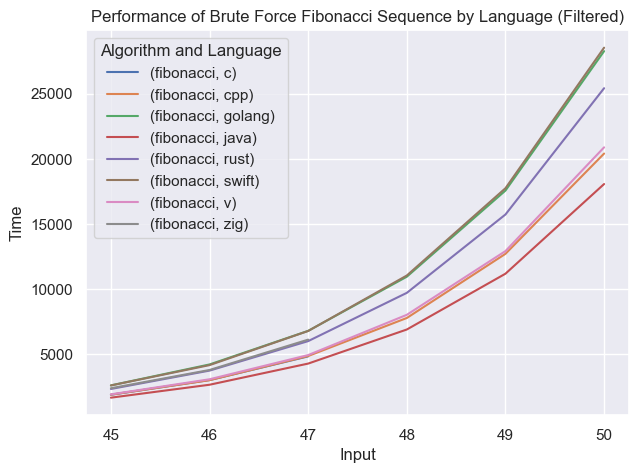

In [18]:
plot_langs(['v', 'c', 'rust', 'cpp', 'golang', 'swift', 'zig', 'java'], 44)
# plot_langs(['v', 'c', 'go', 'rust', 'cpp', 'swift', 'golang', 'java', 'zig'])
